# 性能表现

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_tf_sprs = pd.read_pickle("/home/brian/work/ICLR-Representation_Transferability_X/results(final)/all_tf_sprs.pkl")
# all_metrics_times = pd.read_csv("/home/brian/work/ICLR-Representation_Transferability_X/results(final)/all_metrics_time.csv")
all_metrics_times = pd.read_csv("/home/brian/work/ICLR-Representation_Transferability_X/results(final)/all_metrics_time_unified.csv")

all_tf_sprs.replace({'Wasserstein Distance': "Wasserstein"}, inplace=True)
all_tf_sprs.replace({'OTNCE': "OTCE"}, inplace=True)

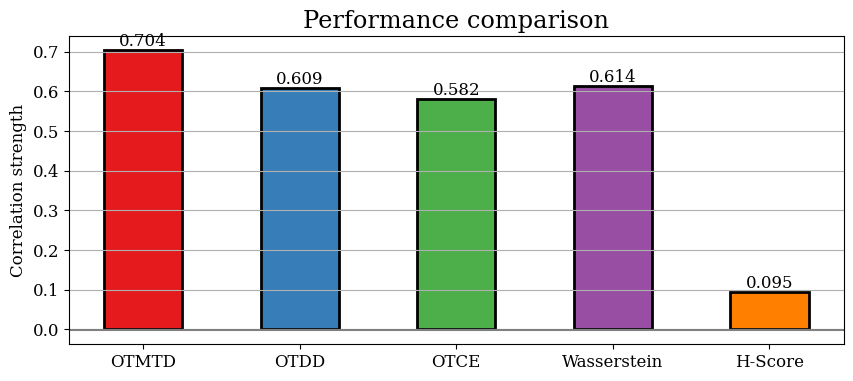

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 100
palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(figsize=(10, 4))

colors = [palette(i) for i in range(len(all_tf_sprs))]
plt.bar(all_tf_sprs['Metric'], np.abs(all_tf_sprs['Spearman']),
        color=colors, width=0.5, linewidth=2, edgecolor='black')
plt.ylabel('Correlation strength', fontsize='large')
ax.tick_params(axis='both', labelsize='large')
plt.grid(axis='y')
plt.axhline(y=-0.002, color='gray')
for x, y in list(zip(ax.get_xticks(), [round(y, 3) for y in np.abs(all_tf_sprs['Spearman'])])):
    if y > 0:
        plt.text(x, y, y, fontdict={'size': 'large'}, ha='center', va='bottom')
    else:
        plt.text(x, y-0.001, y, fontdict={'size': 'large'}, ha='center', va='top')
plt.title("Performance comparison", fontsize='xx-large')
plt.savefig('./paper_figs/perf_comp/correlate_perf_comp.jpg', dpi=1024, bbox_inches='tight')